In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#darren's data
amd_hist = pd.read_csv('data/AMD_data_retrieval.csv')
nvda_hist = pd.read_csv('data/NVDA_data_retrieval.csv')
intc_hist = pd.read_csv('data/INTC_data_retrieval.csv')

#tech indicators
amd_tech = pd.read_csv('data/AMD_technical_indicators.csv')
nvda_tech = pd.read_csv('data/NVDA_technical_indicators.csv')
intc_tech = pd.read_csv('data/INTC_technical_indicators.csv')

#sentiments
amd_sent = pd.read_csv('data/AMD_sentiments.csv')
nvda_sent = pd.read_csv('data/NVDA_sentiments.csv')
intc_sent = pd.read_csv('data/INTC_sentiments.csv')

In [4]:
amd_hist.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Year', 'P/E Ratio', 'Dividend Yield', 'Market Cap',
       'Ticker'],
      dtype='object')

In [5]:
amd_sent.columns

Index(['Unnamed: 0', 'title', 'description', 'source', 'url',
       'sentiment_score'],
      dtype='object')

In [6]:
amd_tech.columns

Index(['Date', 'RSI', 'ATR', 'ADX', 'MACD'], dtype='object')

In [7]:
amd_sent['Ticker'] = 'AMD' #allows us to merge later
nvda_sent['Ticker'] = 'NVDA'
intc_sent['Ticker'] = 'INTC'

In [8]:
amd_merged = amd_hist.merge(amd_tech, on='Date', how='left')
nvda_merged = nvda_hist.merge(nvda_tech, on='Date', how='left')
intc_merged = intc_hist.merge(intc_tech, on='Date', how='left')



In [9]:
amd_merged.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Year', 'P/E Ratio', 'Dividend Yield', 'Market Cap',
       'Ticker', 'RSI', 'ATR', 'ADX', 'MACD'],
      dtype='object')

In [10]:
amd_sent.columns

Index(['Unnamed: 0', 'title', 'description', 'source', 'url',
       'sentiment_score', 'Ticker'],
      dtype='object')

In [11]:
#merging historical data and technical indicators with sentiments
amd_merged = amd_merged.merge(amd_sent, on='Ticker', how='left')
nvda_merged = nvda_merged.merge(nvda_sent, on='Ticker', how='left')
intc_merged = intc_merged.merge(intc_sent, on='Ticker', how='left')

In [12]:
combined_data = pd.concat([amd_merged, nvda_merged, intc_merged])


In [13]:
combined_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Year', 'P/E Ratio', 'Dividend Yield', 'Market Cap',
       'Ticker', 'RSI', 'ATR', 'ADX', 'MACD', 'Unnamed: 0', 'title',
       'description', 'source', 'url', 'sentiment_score'],
      dtype='object')

In [14]:
combined_data.shape

(2804065, 23)

In [15]:
combined_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,P/E Ratio,...,RSI,ATR,ADX,MACD,Unnamed: 0,title,description,source,url,sentiment_score
0,1980-03-17 00:00:00-05:00,0.0,3.302083,3.125,3.145833,219600,0.0,0.0,1980,2.783923,...,NaN,NaN,NaN,NaN,0,Advanced Micro Devices (AMD) Accelerates AI De...,We recently published a list of 15 AI News Upd...,Yahoo Entertainment,https://finance.yahoo.com/news/advanced-micro-...,0.20
1,1980-03-17 00:00:00-05:00,0.0,3.302083,3.125,3.145833,219600,0.0,0.0,1980,2.783923,...,NaN,NaN,NaN,NaN,1,Is AMD Stock Finally Better Than NVDA Stock Af...,Advanced Micro Devices (NASDAQ:AMD) stock has ...,Yahoo Entertainment,https://finance.yahoo.com/news/amd-stock-final...,0.28
2,1980-03-17 00:00:00-05:00,0.0,3.302083,3.125,3.145833,219600,0.0,0.0,1980,2.783923,...,NaN,NaN,NaN,NaN,2,Bezos Backs AI Chipmaker Vying With Nvidia at ...,(Bloomberg) -- Amazon.com Inc. founder Jeff Be...,Yahoo Entertainment,https://finance.yahoo.com/news/bezos-backs-ai-...,0.00
3,1980-03-17 00:00:00-05:00,0.0,3.302083,3.125,3.145833,219600,0.0,0.0,1980,2.783923,...,NaN,NaN,NaN,NaN,3,Advanced Micro Devices (AMD) Shifts to Unified...,We recently published a list of 15 AI News You...,Yahoo Entertainment,https://finance.yahoo.com/news/advanced-micro-...,0.20
4,1980-03-17 00:00:00-05:00,0.0,3.302083,3.125,3.145833,219600,0.0,0.0,1980,2.783923,...,NaN,NaN,NaN,NaN,4,"Advanced Micro Devices, Inc. (AMD): Eyeing $50...",We recently compiled a list of the 15 AI Stock...,Yahoo Entertainment,https://finance.yahoo.com/news/advanced-micro-...,0.20


In [16]:
combined_data.shape

(2804065, 23)

In [17]:
print(combined_data['RSI'].sum(skipna=True))
print(combined_data['ATR'].sum(skipna=True))
print(combined_data['ADX'].sum(skipna=True))
print(combined_data['MACD'].sum(skipna=True)) #bad cols


0.0
0.0
0.0
0.0


In [18]:
bad=['ATR','ADX','MACD','RSI']
#drop bad columns
combined_data = combined_data.drop(columns=bad)

In [19]:
combined_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Year', 'P/E Ratio', 'Dividend Yield', 'Market Cap',
       'Ticker', 'Unnamed: 0', 'title', 'description', 'source', 'url',
       'sentiment_score'],
      dtype='object')

In [20]:
combined_data['Unnamed: 0'].value_counts() #ngl i got no idea what this column is

Unnamed: 0
0     29024
1     29024
2     29024
3     29024
4     29024
      ...  
94    17761
95    17761
96    17761
97    11263
98    11263
Name: count, Length: 99, dtype: int64

In [21]:
combined_data = combined_data.drop(columns='Unnamed: 0') #drop it

In [22]:
combined_data.columns #everything here looks good and can be used.

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Year', 'P/E Ratio', 'Dividend Yield', 'Market Cap',
       'Ticker', 'title', 'description', 'source', 'url', 'sentiment_score'],
      dtype='object')

In [23]:
combined_data.dropna(inplace=True)  #drop rows with missing values

In [24]:
combined_data.shape

(2804065, 18)

In [25]:
combined_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,P/E Ratio,Dividend Yield,Market Cap,Ticker,title,description,source,url,sentiment_score
0,1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125,3.145833,219600,0.0,0.0,1980,2.783923,0.0,5.105089e+09,AMD,Advanced Micro Devices (AMD) Accelerates AI De...,We recently published a list of 15 AI News Upd...,Yahoo Entertainment,https://finance.yahoo.com/news/advanced-micro-...,0.200000
1,1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125,3.145833,219600,0.0,0.0,1980,2.783923,0.0,5.105089e+09,AMD,Is AMD Stock Finally Better Than NVDA Stock Af...,Advanced Micro Devices (NASDAQ:AMD) stock has ...,Yahoo Entertainment,https://finance.yahoo.com/news/amd-stock-final...,0.280000
2,1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125,3.145833,219600,0.0,0.0,1980,2.783923,0.0,5.105089e+09,AMD,Bezos Backs AI Chipmaker Vying With Nvidia at ...,(Bloomberg) -- Amazon.com Inc. founder Jeff Be...,Yahoo Entertainment,https://finance.yahoo.com/news/bezos-backs-ai-...,0.000000
3,1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125,3.145833,219600,0.0,0.0,1980,2.783923,0.0,5.105089e+09,AMD,Advanced Micro Devices (AMD) Shifts to Unified...,We recently published a list of 15 AI News You...,Yahoo Entertainment,https://finance.yahoo.com/news/advanced-micro-...,0.200000
4,1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125,3.145833,219600,0.0,0.0,1980,2.783923,0.0,5.105089e+09,AMD,"Advanced Micro Devices, Inc. (AMD): Eyeing $50...",We recently compiled a list of the 15 AI Stock...,Yahoo Entertainment,https://finance.yahoo.com/news/advanced-micro-...,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115032,2024-11-15 00:00:00-05:00,24.809999,24.820000,24.230,24.350000,54931400,0.0,0.0,2024,-6.510695,0.0,1.050216e+11,INTC,Lenovo Launches ThinkShield Firmware Assurance...,Lenovo Launches ThinkShield Firmware Assurance...,Investing.com,https://www.investing.com/news/press-releases/...,0.000000
1115033,2024-11-15 00:00:00-05:00,24.809999,24.820000,24.230,24.350000,54931400,0.0,0.0,2024,-6.510695,0.0,1.050216e+11,INTC,ath9k (wi-fi) driver doesn't work properly wit...,i have an issue with my WIFI\r\nit works fine ...,Askubuntu.com,https://askubuntu.com/questions/1531967/ath9k-...,0.054167
1115034,2024-11-15 00:00:00-05:00,24.809999,24.820000,24.230,24.350000,54931400,0.0,0.0,2024,-6.510695,0.0,1.050216e+11,INTC,Wi-Fi Chipsets Global Strategic Business Repor...,"Dublin, Nov. 19, 2024 (GLOBE NEWSWIRE) -- The ...",GlobeNewswire,https://www.globenewswire.com/news-release/202...,0.000000
1115035,2024-11-15 00:00:00-05:00,24.809999,24.820000,24.230,24.350000,54931400,0.0,0.0,2024,-6.510695,0.0,1.050216e+11,INTC,"Vietnam Data Center Networking Market Trends, ...","Dublin, Nov. 25, 2024 (GLOBE NEWSWIRE) -- The ...",GlobeNewswire,https://www.globenewswire.com/news-release/202...,-0.100000


In [26]:
combined_data.to_csv('data/combined_data.csv')

## YOU DONT NEED TO RUN PAST THIS STEP FOR VISUALIZATION PEOPLE

In [19]:
combined_data = combined_data.iloc[:-1]


In [21]:
#combined_data['Price_Change'] = combined_data['Close'].pct_change()
combined_data['Price_Increase'] = (combined_data['Close'].shift(-1) > combined_data['Close']).astype(int)


In [24]:
combined_data['Price_Increase'].value_counts()

Price_Increase
0    2789841
1      14222
Name: count, dtype: int64

In [28]:
combined_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Year', 'P/E Ratio', 'Dividend Yield', 'Market Cap',
       'Ticker', 'title', 'description', 'source', 'url', 'sentiment_score',
       'Price_Increase'],
      dtype='object')

In [43]:
combined_data['Price_Change'] = combined_data['Close'].pct_change()
combined_data['SMA_5'] = combined_data['Close'].rolling(window=5).mean()
combined_data['SMA_10'] = combined_data['Close'].rolling(window=10).mean()
combined_data['SMA_20'] = combined_data['Close'].rolling(window=20).mean()

combined_data = combined_data.dropna()

#select key columns needed for the model
key_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change', 'SMA_5', 'SMA_10', 'SMA_20', 'Price_Increase']
filtered_data = combined_data[key_columns]


In [44]:
from sklearn.utils import resample #to balance the data
df_majority = filtered_data[filtered_data.Price_Increase == 0]
df_minority = filtered_data[filtered_data.Price_Increase == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

#combine majority class with upsampled minority class
filtered_data_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [49]:
#x and y for train test split
X = filtered_data.drop(columns=['Price_Increase'])
y = filtered_data['Price_Increase']

In [50]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

#initialize the logistic regression model
model = LogisticRegression(max_iter=1000) #setting an upper bound so i dont run the model for like 5 hours

#train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
#predict the labels of the test set
y_pred = model.predict(X_test) #pretty accurate!
print(max(y_pred)) #0 therefore the model is predicting the price will not increase
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#print the classification report
print(classification_report(y_test, y_pred, zero_division=0))


0
Accuracy: 0.994928754709714
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    557965
           1       0.00      0.00      0.00      2844

    accuracy                           0.99    560809
   macro avg       0.50      0.50      0.50    560809
weighted avg       0.99      0.99      0.99    560809



Visualizations

NVIDIA (NVDA) Stock Splits:

September 20, 2021: 4-for-1 split
July 20, 2000: 2-for-1 split
June 26, 2000: 2-for-1 split
September 11, 2006: 2-for-1 split
April 6, 2007: 3-for-2 split

AMD (Advanced Micro Devices) Stock Splits:

August 14, 2000: 2-for-1 split
May 21, 1986: 2-for-1 split
December 27, 1982: 3-for-2 split
June 1, 1981: 5-for-4 split
March 16, 1981: 3-for-2 split

Intel (INTC) Stock Splits:

July 30, 2000: 2-for-1 split
April 11, 1999: 2-for-1 split
January 24, 1997: 2-for-1 split
June 6, 1995: 2-for-1 split
May 3, 1993: 3-for-2 split
June 16, 1992: 2-for-1 split
May 18, 1989: 5-for-4 split
October 9, 1987: 3-for-2 split

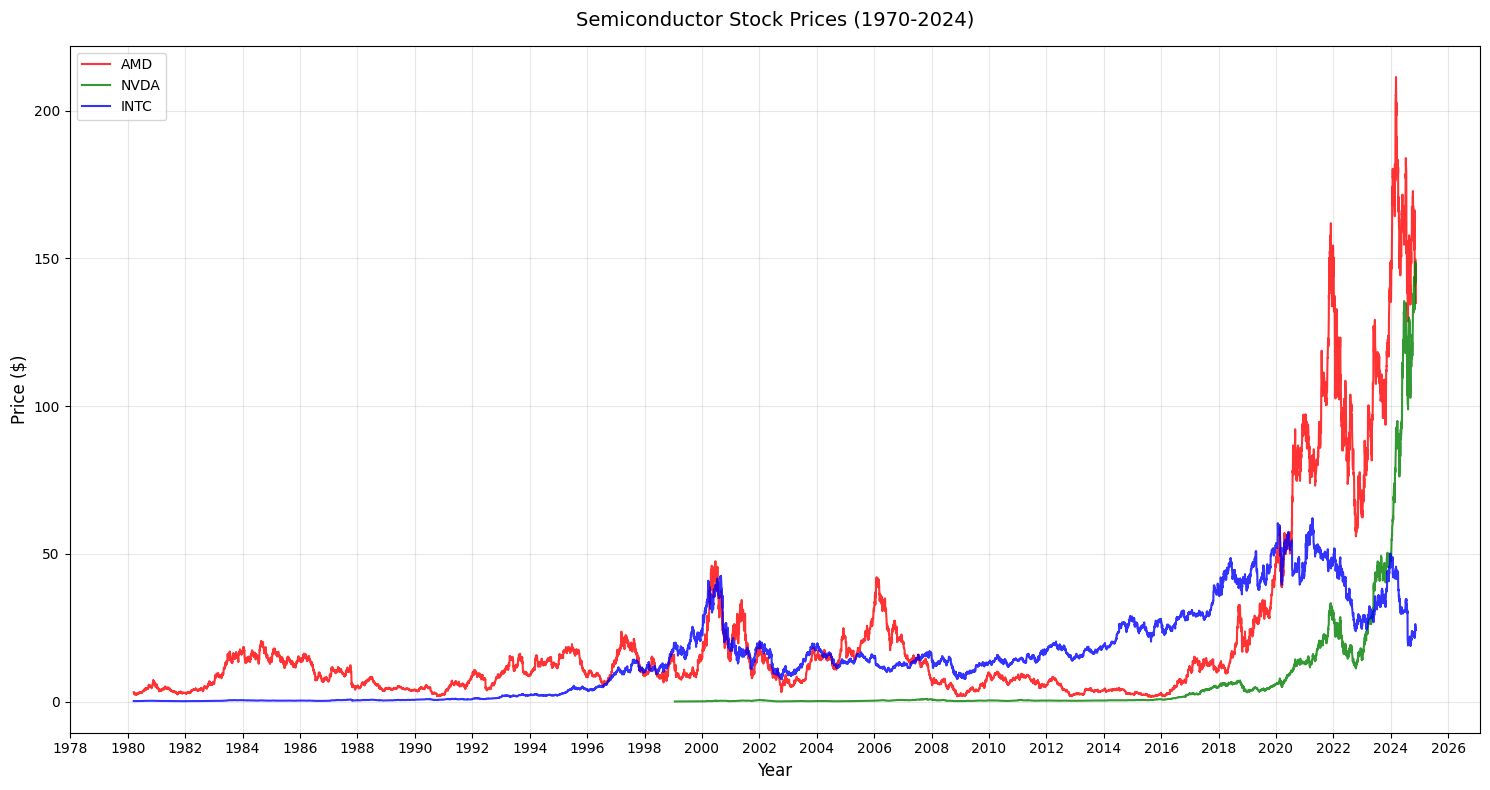

In [ ]:
import matplotlib.dates as mdates

combined_data['Date'] = pd.to_datetime(combined_data['Date'], utc=True)

# Group data by Date and Ticker daily
historical_data = combined_data.groupby(['Date', 'Ticker']).agg({
    'Close': 'last',
}).reset_index()

plt.figure(figsize=(15, 8))

# Plotting prices
colors = {'AMD': 'red', 'NVDA': 'green', 'INTC': 'blue'}
for ticker in ['AMD', 'NVDA', 'INTC']:
    ticker_data = historical_data[historical_data['Ticker'] == ticker].sort_values('Date')
    plt.plot(ticker_data['Date'], 
             ticker_data['Close'],
             label=ticker, 
             color=colors[ticker],
             alpha=0.8)

plt.title('Semiconductor Stock Prices (1970-2024)', pad=15, fontsize=14)
plt.ylabel('Price ($)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

# Format x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Format y-axis to use comma separator for thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

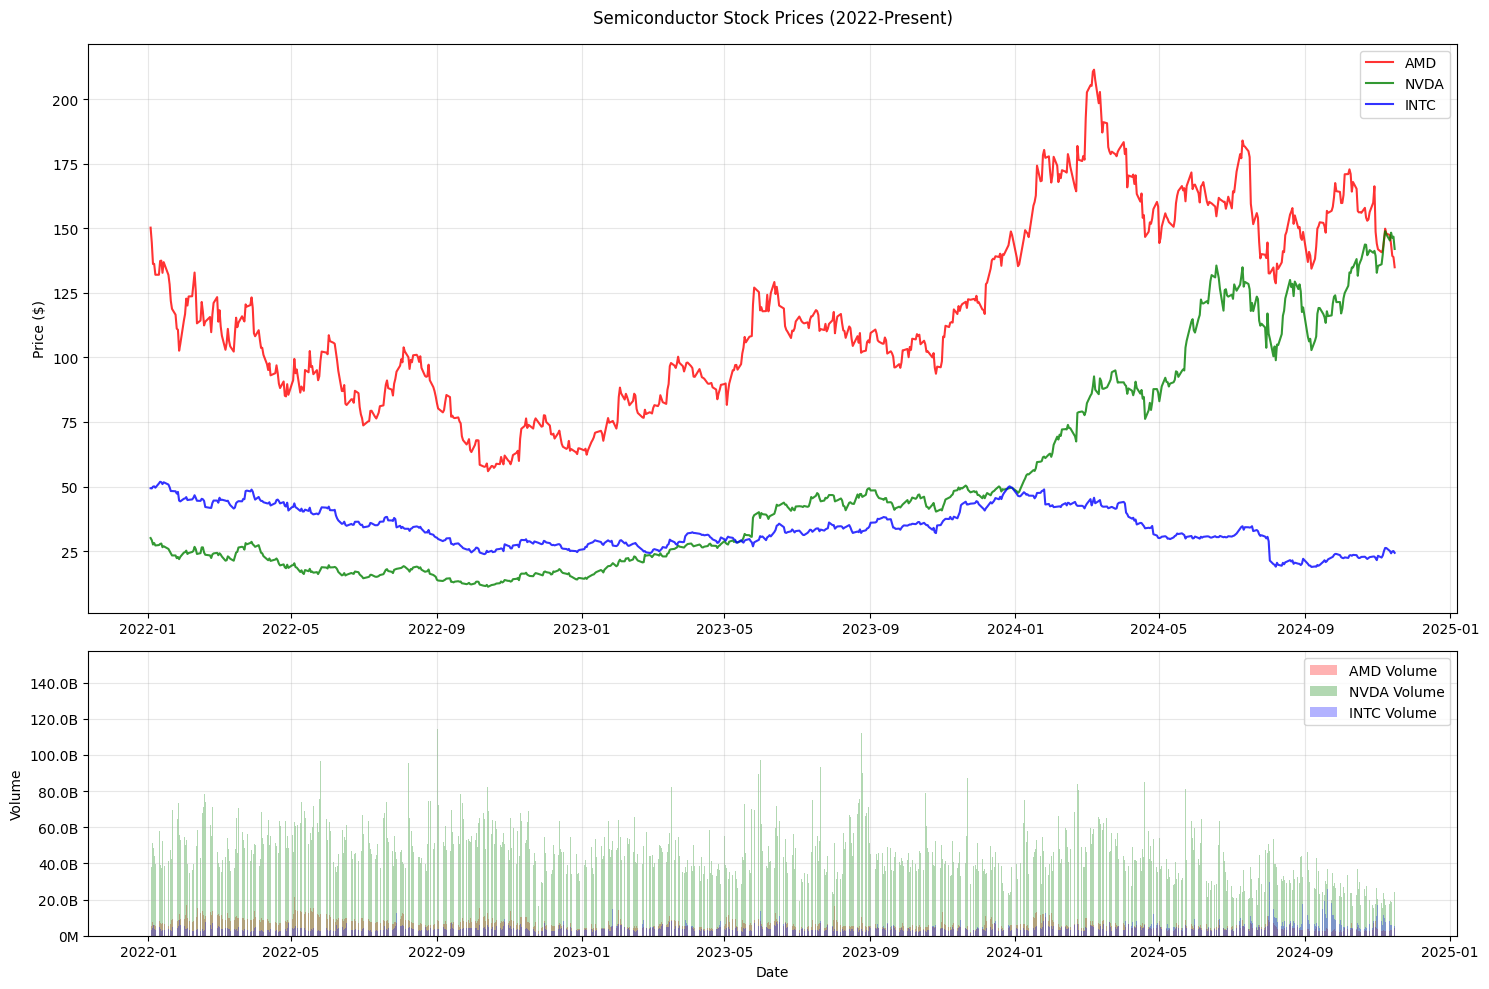

In [43]:
combined_data['Date'] = pd.to_datetime(combined_data['Date'], utc=True)

# Filter for last 2 years of data
recent_date = pd.to_datetime('2022-01-01', utc=True)
recent_data = combined_data[combined_data['Date'] >= recent_date]

# Group data by Date and Ticker daily
recent_data = recent_data.groupby(['Date', 'Ticker']).agg({
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [2, 1]})

# Top Plot
colors = {'AMD': 'red', 'NVDA': 'green', 'INTC': 'blue'}
for ticker in ['AMD', 'NVDA', 'INTC']:
    ticker_data = recent_data[recent_data['Ticker'] == ticker].sort_values('Date')
    ax1.plot(ticker_data['Date'], 
             ticker_data['Close'],
             label=ticker, 
             color=colors[ticker],
             alpha=0.8)

ax1.set_title('Semiconductor Stock Prices (2022-Present)', pad=15)
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bottom Plot
for ticker in ['AMD', 'NVDA', 'INTC']:
    ticker_data = recent_data[recent_data['Ticker'] == ticker].sort_values('Date')
    ax2.bar(ticker_data['Date'],
            ticker_data['Volume'],
            label=f'{ticker} Volume', 
            color=colors[ticker],
            alpha=0.3)

ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Format y-axis for volume to show millions/billions
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M' if x < 1e9 else f'{x/1e9:.1f}B'))

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

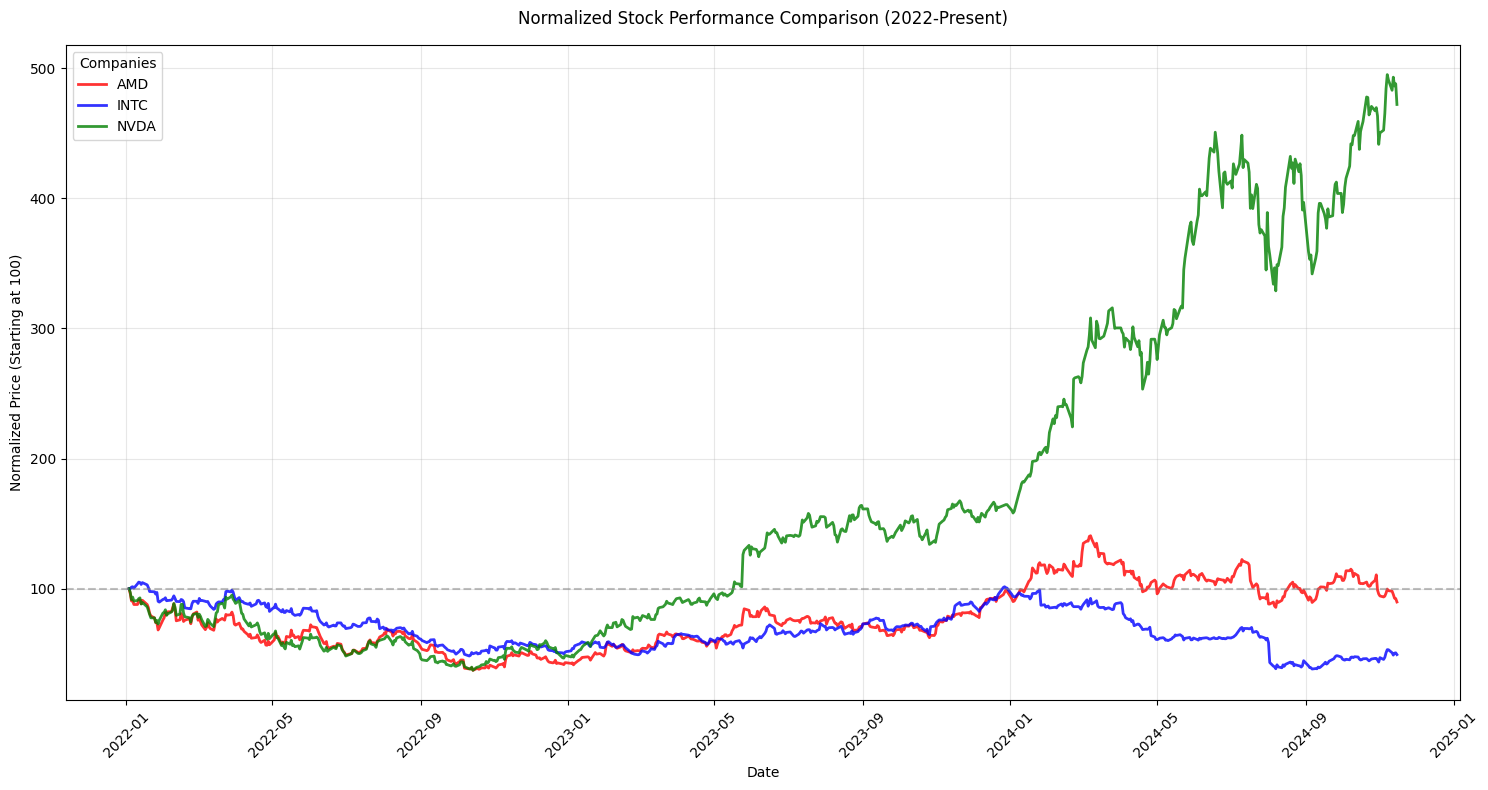

In [ ]:
combined_data['Date'] = pd.to_datetime(combined_data['Date'], utc=True)

# Filter for recent data (e.g., last 2 years)
recent_date = pd.to_datetime('2022-01-01', utc=True)
comparison_data = combined_data[combined_data['Date'] >= recent_date]

# Group by Date and Ticker to get daily prices
comparison_data = comparison_data.groupby(['Date', 'Ticker'])['Close'].last().reset_index()

# Pivot the data to get separate columns for each ticker
pivot_data = comparison_data.pivot(index='Date', columns='Ticker', values='Close')

# Calculate normalized returns (starting from 100)
normalized_data = pivot_data / pivot_data.iloc[0] * 100

# Create the visualization
plt.figure(figsize=(15, 8))

# Plot normalized prices
colors = {'AMD': 'red', 'NVDA': 'green', 'INTC': 'blue'}
for column in normalized_data.columns:
    plt.plot(normalized_data.index, 
             normalized_data[column], 
             label=column, 
             color=colors[column],
             linewidth=2,
             alpha=0.8)

# Customize the plot
plt.title('Normalized Stock Performance Comparison (2022-Present)', pad=15)
plt.xlabel('Date')
plt.ylabel('Normalized Price (Starting at 100)')
plt.legend(title='Companies')
plt.grid(True, alpha=0.3)

# Add horizontal line at 100
plt.axhline(y=100, color='gray', linestyle='--', alpha=0.5)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\timso\AppData\Local\Temp\ipykernel_5468\3642892403.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  axes[row, col].plot(company_data['sentiment_score'],


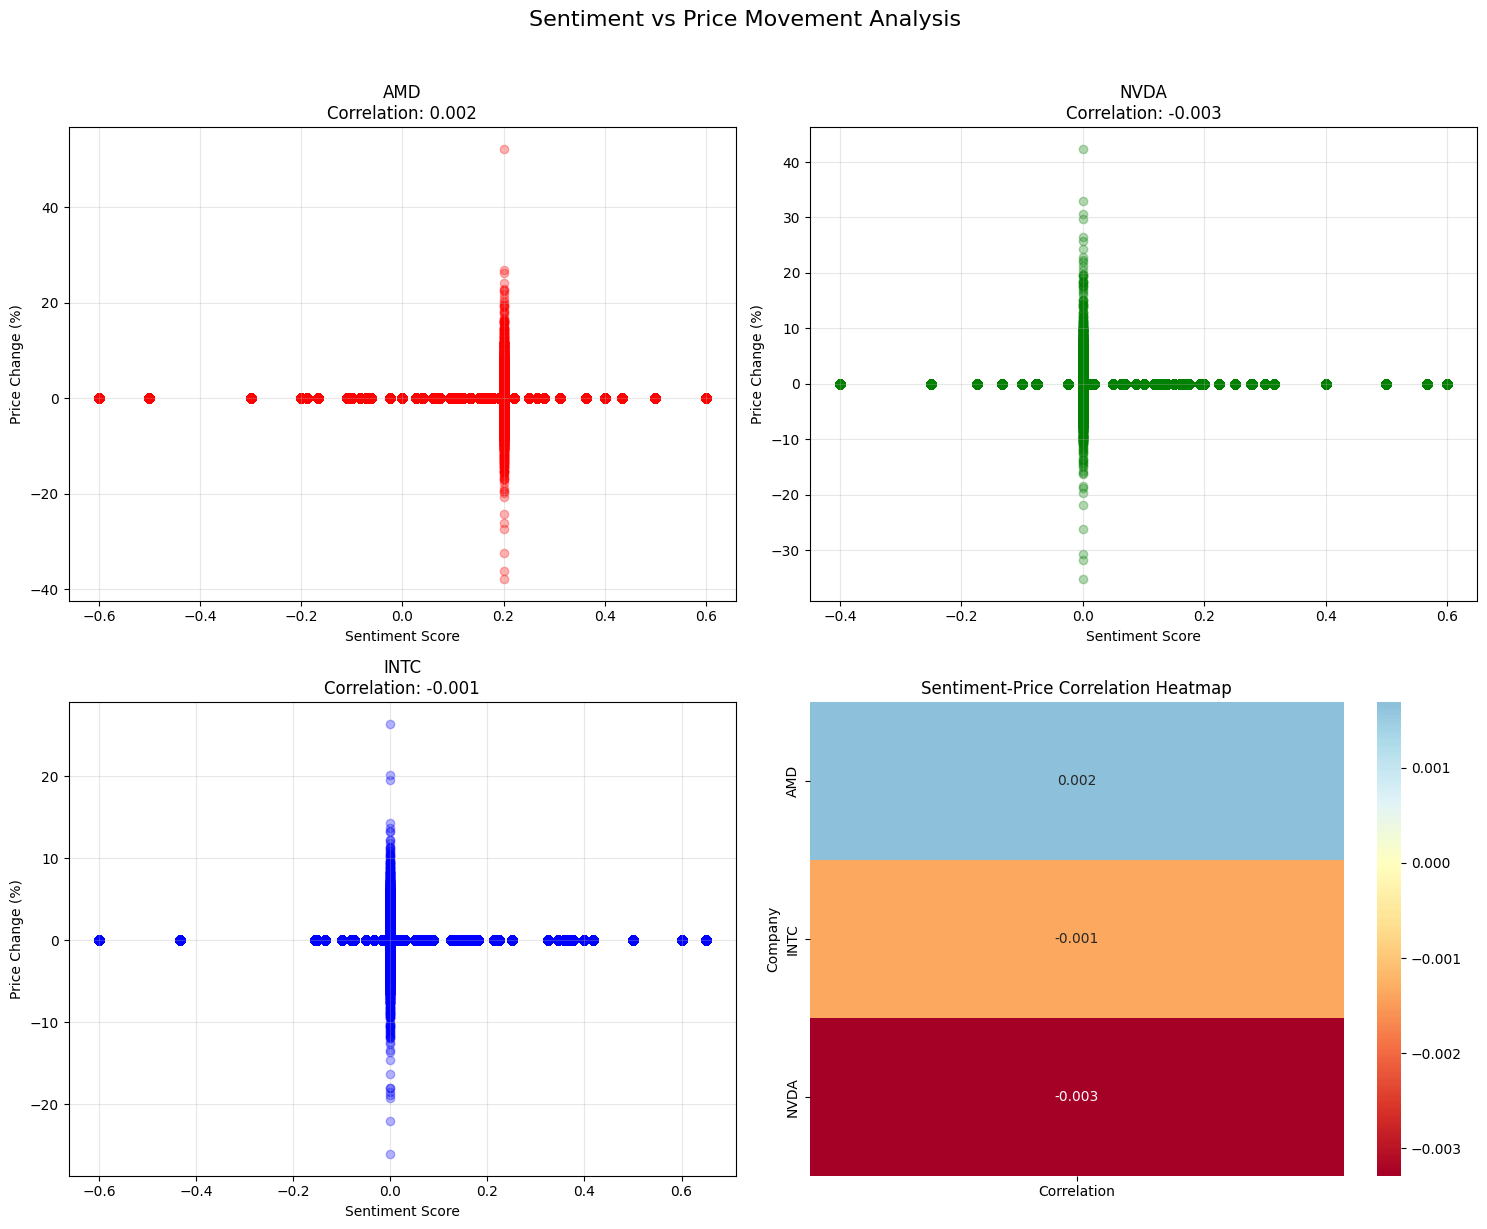


Summary Statistics:

AMD:
Average Sentiment Score: 0.088
Median Price Change: 0.000%
Number of News Articles: 1058722

NVDA:
Average Sentiment Score: 0.123
Median Price Change: 0.000%
Number of News Articles: 630306

INTC:
Average Sentiment Score: 0.088
Median Price Change: 0.000%
Number of News Articles: 1115037


In [35]:
# Convert Date column to datetime if not already done
combined_data['Date'] = pd.to_datetime(combined_data['Date'], utc=True)

# Calculate daily price changes
combined_data['Price_Change_Pct'] = combined_data.groupby('Ticker')['Close'].pct_change() * 100

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Sentiment vs Price Movement Analysis', fontsize=16, y=1.02)

# Colors for each company
colors = {'AMD': 'red', 'NVDA': 'green', 'INTC': 'blue'}

# Scatter plot for each company
for idx, ticker in enumerate(['AMD', 'NVDA', 'INTC']):
    row = idx // 2
    col = idx % 2
    
    company_data = combined_data[combined_data['Ticker'] == ticker]
    
    # Create scatter plot
    axes[row, col].scatter(company_data['sentiment_score'], 
                          company_data['Price_Change_Pct'],
                          alpha=0.3,
                          color=colors[ticker])
    
    # Add trend line
    z = np.polyfit(company_data['sentiment_score'], 
                   company_data['Price_Change_Pct'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(company_data['sentiment_score'], 
                       p(company_data['sentiment_score']), 
                       "r--", 
                       color='black',
                       alpha=0.8)
    
    # Calculate correlation coefficient
    corr = company_data['sentiment_score'].corr(company_data['Price_Change_Pct'])
    
    axes[row, col].set_title(f'{ticker}\nCorrelation: {corr:.3f}')
    axes[row, col].set_xlabel('Sentiment Score')
    axes[row, col].set_ylabel('Price Change (%)')
    axes[row, col].grid(True, alpha=0.3)

# Create heatmap in the fourth subplot
correlations = []
companies = ['AMD', 'NVDA', 'INTC']
for company in companies:
    company_data = combined_data[combined_data['Ticker'] == company]
    corr = company_data['sentiment_score'].corr(company_data['Price_Change_Pct'])
    correlations.append([company, corr])

corr_df = pd.DataFrame(correlations, columns=['Company', 'Correlation'])
corr_matrix = corr_df.pivot_table(index='Company', values='Correlation')

sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='RdYlBu', 
            center=0,
            ax=axes[1, 1],
            fmt='.3f')
axes[1, 1].set_title('Sentiment-Price Correlation Heatmap')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
for ticker in ['AMD', 'NVDA', 'INTC']:
    company_data = combined_data[combined_data['Ticker'] == ticker]
    print(f"\n{ticker}:")
    print(f"Average Sentiment Score: {company_data['sentiment_score'].mean():.3f}")
    print(f"Median Price Change: {company_data['Price_Change_Pct'].median():.3f}%")
    print(f"Number of News Articles: {len(company_data['sentiment_score'].dropna())}")

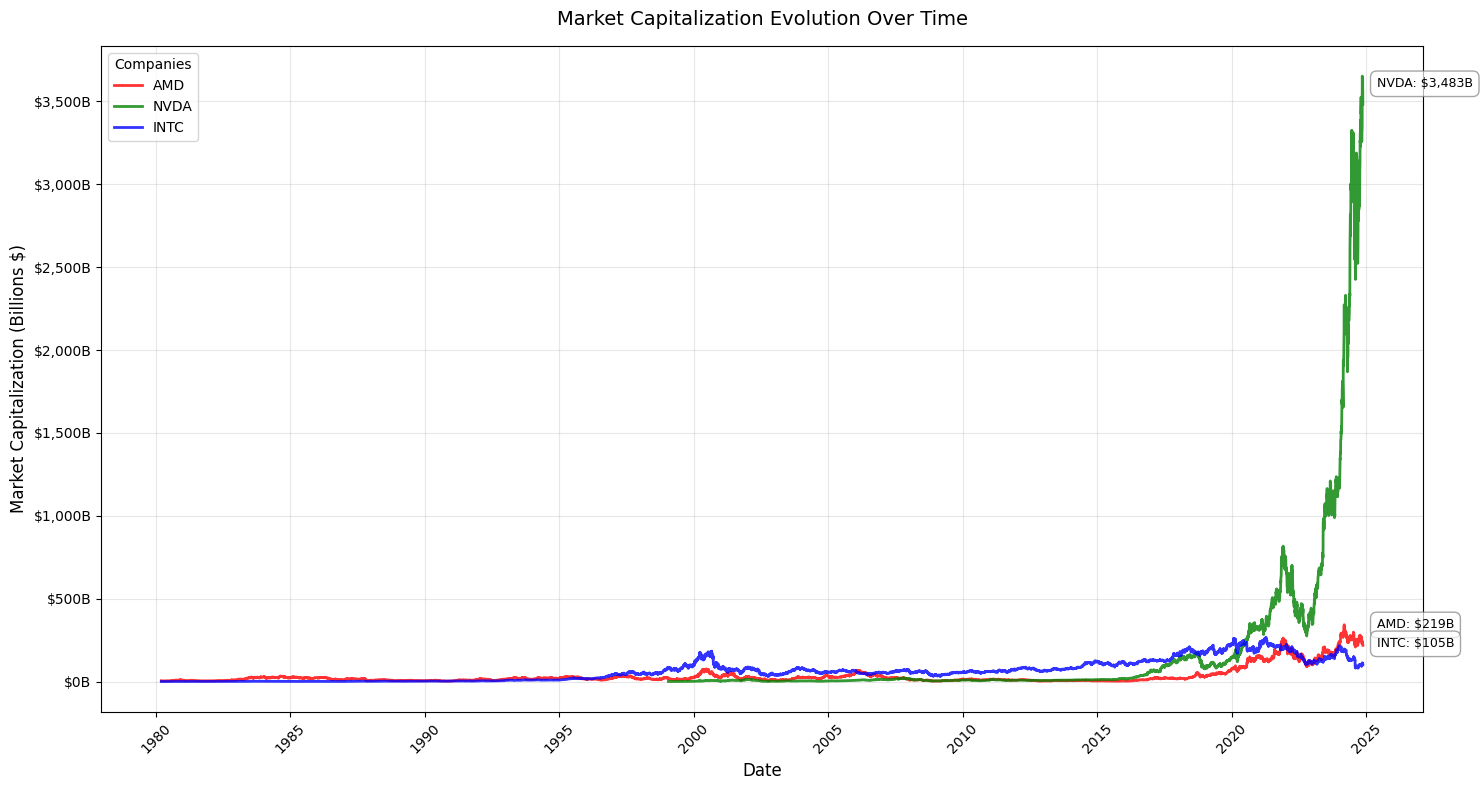


Market Capitalization Summary (in Billions $):

AMD:
Current Market Cap: $218.92B
Peak Market Cap: $343.03B
Growth since 2022: 4188.2%

NVDA:
Current Market Cap: $3,482.77B
Peak Market Cap: $3,652.03B
Growth since 2022: 377328.0%

INTC:
Current Market Cap: $105.02B
Peak Market Cap: $267.77B
Growth since 2022: 13316.0%


In [ ]:
combined_data['Date'] = pd.to_datetime(combined_data['Date'], utc=True)

# Group by Date and Ticker to get daily market cap values (avoiding duplicates)
market_cap_data = combined_data.groupby(['Date', 'Ticker'])['Market Cap'].last().reset_index()

plt.figure(figsize=(15, 8))

# RGB!
colors = {'AMD': 'red', 'NVDA': 'green', 'INTC': 'blue'}

# Plotting Market Cap
for ticker in ['AMD', 'NVDA', 'INTC']:
    company_data = market_cap_data[market_cap_data['Ticker'] == ticker]
    
    # Converting market cap to billions
    market_cap_billions = company_data['Market Cap'] / 1e9
    
    plt.plot(company_data['Date'], 
             market_cap_billions,
             label=f'{ticker}',
             color=colors[ticker],
             linewidth=2,
             alpha=0.8)

plt.title('Market Capitalization Evolution Over Time', pad=15, fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Market Capitalization (Billions $)', fontsize=12)
plt.legend(title='Companies', fontsize=10)
plt.grid(True, alpha=0.3)

# Format y-axis to show billions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}B'))

plt.xticks(rotation=45)

# Add annotations for latest values
for ticker in ['AMD', 'NVDA', 'INTC']:
    company_data = market_cap_data[market_cap_data['Ticker'] == ticker]
    latest_date = company_data['Date'].max()
    latest_value = company_data[company_data['Date'] == latest_date]['Market Cap'].values[0] / 1e9
    plt.annotate(f'{ticker}: ${latest_value:,.0f}B',
                xy=(latest_date, latest_value),
                xytext=(10, 10),
                textcoords='offset points',
                ha='left',
                va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.7),
                fontsize=9)

# Adjust layout
plt.tight_layout()

plt.show()

# Print summary statistics
print("\nMarket Capitalization Summary (in Billions $):")
for ticker in ['AMD', 'NVDA', 'INTC']:
    company_data = market_cap_data[market_cap_data['Ticker'] == ticker]
    print(f"\n{ticker}:")
    print(f"Current Market Cap: ${company_data['Market Cap'].iloc[-1]/1e9:,.2f}B")
    print(f"Peak Market Cap: ${company_data['Market Cap'].max()/1e9:,.2f}B")
    print(f"Growth since 2022: {((company_data['Market Cap'].iloc[-1]/company_data['Market Cap'].iloc[0])-1)*100:.1f}%")

C:\Users\timso\AppData\Local\Temp\ipykernel_24492\2643108635.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ticker',



P/E Ratio Summary Statistics (Since 2022):

AMD:
Current P/E Ratio: 119.38
Average P/E Ratio: 103.24
Median P/E Ratio: 97.69
P/E Ratio Range: 49.50 to 187.06

NVDA:
Current P/E Ratio: 66.66
Average P/E Ratio: 23.91
Median P/E Ratio: 18.82
P/E Ratio Range: 5.27 to 69.90

INTC:
Current P/E Ratio: -6.51
Average P/E Ratio: -9.07
Median P/E Ratio: -8.87
P/E Ratio Range: -13.86 to -5.05


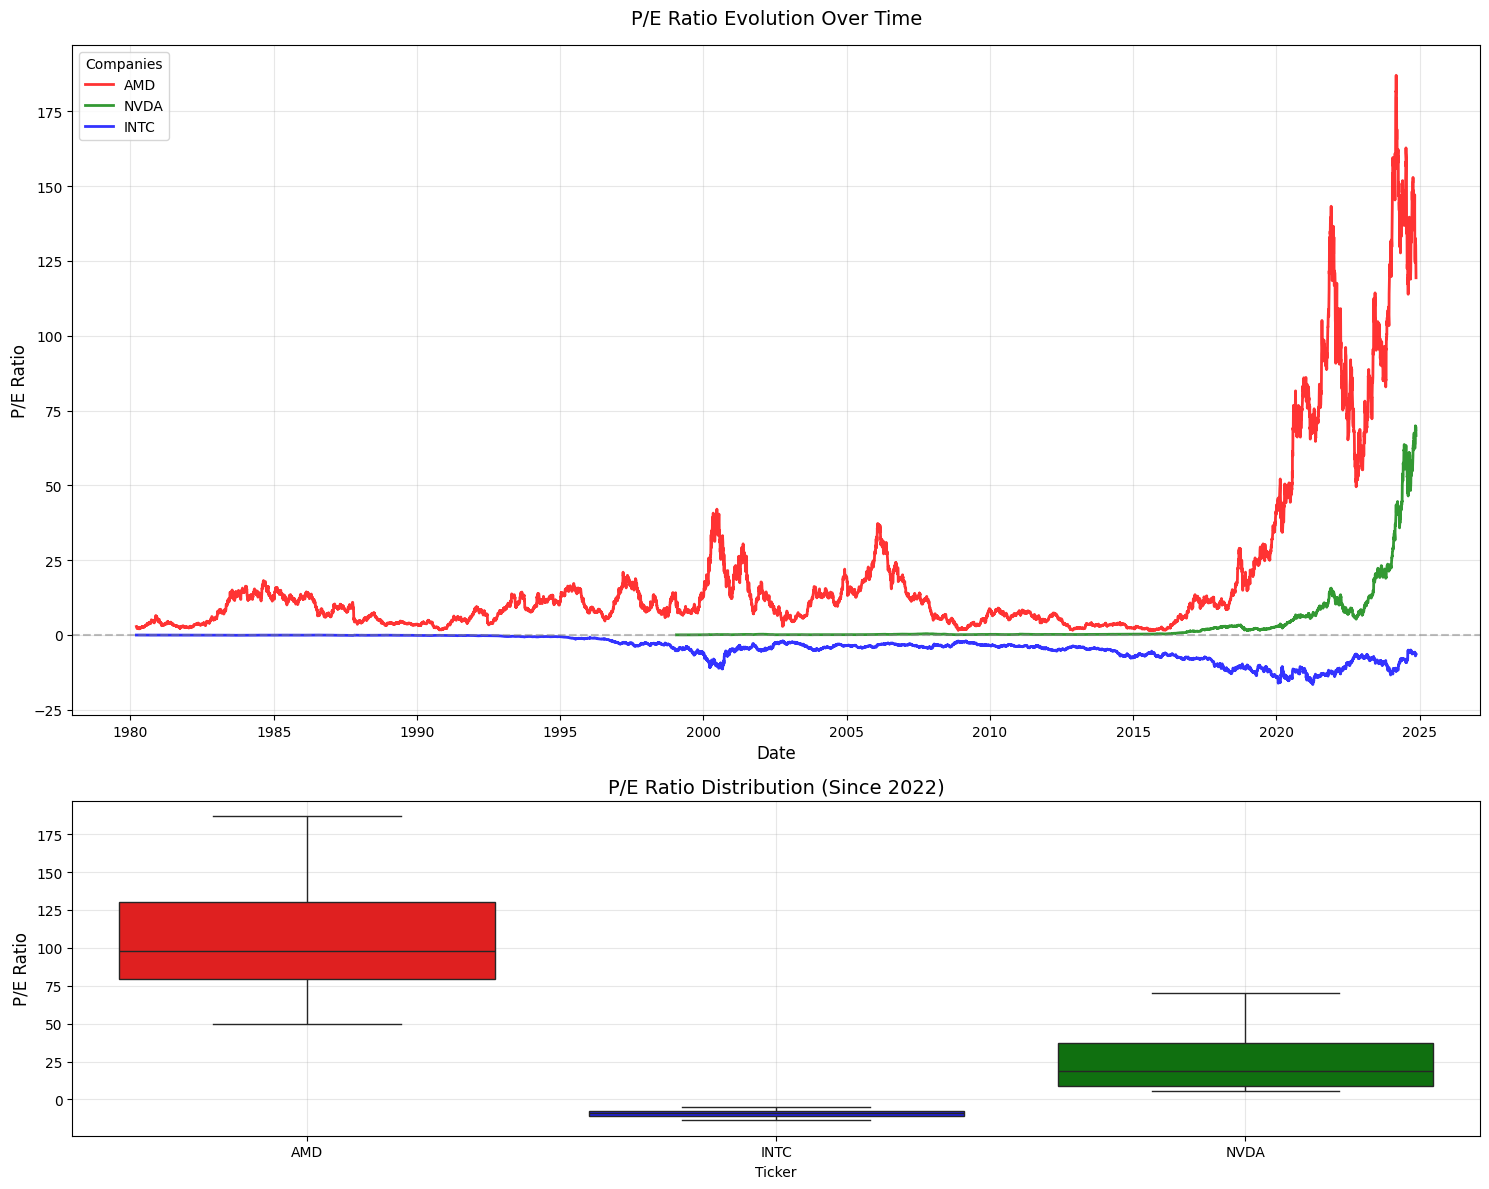

In [ ]:
from matplotlib.ticker import FuncFormatter

combined_data = pd.read_csv('data/combined_data.csv')

# Convert Date column to datetime if not already done
combined_data['Date'] = pd.to_datetime(combined_data['Date'], utc=True)

# Group by Date and Ticker to get daily PE values (avoiding duplicates)
pe_data = combined_data.groupby(['Date', 'Ticker'])['P/E Ratio'].last().reset_index()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), height_ratios=[2, 1])

# RGB! Colors for each company
colors = {'AMD': 'red', 'NVDA': 'green', 'INTC': 'blue'}

# Line Plot of P/E Evolution
for ticker in ['AMD', 'NVDA', 'INTC']:
    company_data = pe_data[pe_data['Ticker'] == ticker]
    
    # Filter out extreme values for better visualization
    company_data = company_data[
        (company_data['P/E Ratio'] < 200) & 
        (company_data['P/E Ratio'] > -200)
    ]
    
    ax1.plot(company_data['Date'], 
             company_data['P/E Ratio'],
             label=f'{ticker}',
             color=colors[ticker],
             linewidth=2,
             alpha=0.8)

# Customize the first plot
ax1.set_title('P/E Ratio Evolution Over Time', pad=15, fontsize=14)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('P/E Ratio', fontsize=12)
ax1.legend(title='Companies', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

# Box Plot of P/E Ratios
recent_date = pd.to_datetime('2022-01-01', utc=True)
recent_pe_data = pe_data[pe_data['Date'] >= recent_date]

# Filter extreme values for box plot
recent_pe_data = recent_pe_data[
    (recent_pe_data['P/E Ratio'] < 200) & 
    (recent_pe_data['P/E Ratio'] > -200)
]

sns.boxplot(x='Ticker', 
            y='P/E Ratio',
            data=recent_pe_data,
            palette=colors,
            ax=ax2)

ax2.set_title('P/E Ratio Distribution (Since 2022)', fontsize=14)
ax2.set_ylabel('P/E Ratio', fontsize=12)
ax2.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Print summary statistics
print("\nP/E Ratio Summary Statistics (Since 2022):")
for ticker in ['AMD', 'NVDA', 'INTC']:
    company_data = recent_pe_data[recent_pe_data['Ticker'] == ticker]
    print(f"\n{ticker}:")
    print(f"Current P/E Ratio: {company_data['P/E Ratio'].iloc[-1]:.2f}")
    print(f"Average P/E Ratio: {company_data['P/E Ratio'].mean():.2f}")
    print(f"Median P/E Ratio: {company_data['P/E Ratio'].median():.2f}")
    print(f"P/E Ratio Range: {company_data['P/E Ratio'].min():.2f} to {company_data['P/E Ratio'].max():.2f}")

plt.show()